# Lab 7: APIs

In [1]:
import requests
import json

lat = "41.919822"
lon = "-75.366605"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json() 

forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)
json = new_request.json()

days = json["properties"]["periods"]
for i in days:
    print(i['name'])
    print(f"{i['temperature']}{i['temperatureUnit']}")
    print(i["detailedForecast"])

This Afternoon
37F
A slight chance of snow showers after 3pm. Partly sunny, with a high near 37. West wind 8 to 12 mph. Chance of precipitation is 20%. Little or no snow accumulation expected.
Tonight
17F
A slight chance of snow showers before 1am. Partly cloudy, with a low around 17. West wind 12 to 16 mph, with gusts as high as 26 mph. Chance of precipitation is 20%. New snow accumulation of less than half an inch possible.
Sunday
29F
A slight chance of snow showers between 1pm and 5pm. Partly sunny, with a high near 29. West wind around 20 mph, with gusts as high as 32 mph. Chance of precipitation is 20%. New snow accumulation of less than half an inch possible.
Sunday Night
21F
Mostly clear, with a low around 21. West wind 13 to 17 mph, with gusts as high as 28 mph. New rainfall amounts less than a tenth of an inch possible.
Monday
46F
Sunny, with a high near 46. West wind around 13 mph.
Monday Night
24F
Mostly clear, with a low around 24.
Tuesday
51F
Mostly sunny, with a high near

In [12]:
import requests
import json
import csv
import pandas as pd

API_key = "648d99ee99fc082590e04ae31899d25a6ff30cce"
url = f"https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&HISP=2&for=state:*&key={API_key}"

census_data = requests.get(url)
json_file = census_data.json()

json_file

[['NAME', 'POP', 'HISP', 'state'],
 ['Mississippi', '100110', '2', '28'],
 ['Missouri', '268708', '2', '29'],
 ['Montana', '43289', '2', '30'],
 ['Nebraska', '219645', '2', '31'],
 ['Nevada', '900600', '2', '32'],
 ['New Hampshire', '54589', '2', '33'],
 ['New Jersey', '1856844', '2', '34'],
 ['New Mexico', '1032942', '2', '35'],
 ['New York', '3751058', '2', '36'],
 ['North Carolina', '1025830', '2', '37'],
 ['North Dakota', '31532', '2', '38'],
 ['Ohio', '470462', '2', '39'],
 ['Oklahoma', '438110', '2', '40'],
 ['Oregon', '566847', '2', '41'],
 ['Pennsylvania', '1000150', '2', '42'],
 ['Rhode Island', '172644', '2', '44'],
 ['South Carolina', '307118', '2', '45'],
 ['South Dakota', '37351', '2', '46'],
 ['Tennessee', '391382', '2', '47'],
 ['Texas', '11525578', '2', '48'],
 ['Vermont', '12719', '2', '50'],
 ['Utah', '462051', '2', '49'],
 ['Virginia', '834422', '2', '51'],
 ['Washington', '991721', '2', '53'],
 ['West Virginia', '31162', '2', '54'],
 ['Wisconsin', '413208', '2', '55

In [14]:
data_file = open("census_data.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(data_file)
csv_writer.writerow(["Name", "Population", "HISP-ID", "State"])

for list in json_file:
    if list == json_file[0]:
        pass
    else:
        name = list[0]
        pop = list[1]
        hisp = list[2]
        state = list[3]
        
        csv_writer.writerow([name, pop, hisp, state])
        
data_file.close()

sheet = pd.read_csv("census_data.csv")
sheet = sheet.sort_values(by="Population", ascending=False)
sheet

,Name,Population,HISP-ID,State
31,California,15574880,2,6
19,Texas,11525578,2,48
36,Florida,5663860,2,12
8,New York,3751058,2,36
29,Arizona,2310590,2,4
40,Illinois,2219882,2,17
6,New Jersey,1856844,2,34
32,Colorado,1256904,2,8
37,Georgia,1048724,2,13
7,New Mexico,1032942,2,35


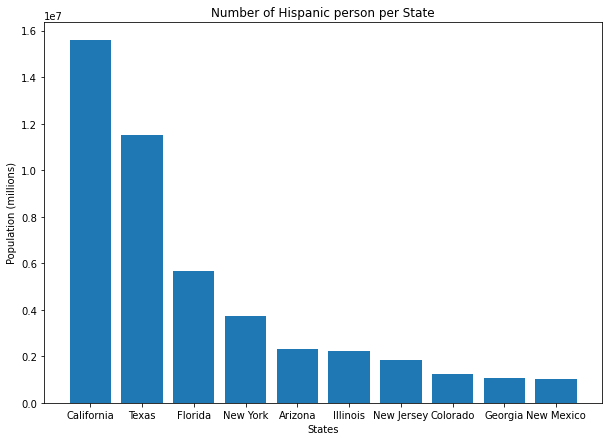

In [15]:
from matplotlib import pyplot as plt
import numpy as np

df = pd.DataFrame(sheet)

name = df["Name"]
pop = df["Population"]

fig = plt.figure(figsize = (10,7))
plt.bar(name[0:10], pop[0:10])

plt.xlabel("States")
plt.ylabel("Population (millions)")
plt.title("Number of Hispanic person per State")

plt.show()

# Post Lab

- Use our weather data we covered in Monday’s class and covert those three elements (day, temp, description) into a CSV (1pt). Using the techniques covered in this slide deck, convert that CSV into a bar graph – y axis should be the temperature, x axis should be the day (3pts)
- Bonus (1pt) figure out how to make the days from the weather graph not crowd each other on the x axis. Comment the source you used 

In [85]:
import requests
import json
import csv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

csv_file = open("weather_data", "w", newline = "", encoding = "utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Day", "Temperature", "Description"])

lat = "41.919822"
lon = "-75.366605"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json() 

forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)
json = new_request.json()

days = json["properties"]["periods"]
for i in days:
    name = i['name']
    temp = int(i['temperature'])
    desc = i["detailedForecast"]
    csv_writer.writerow([name, temp, desc])
    
csv_file.close()

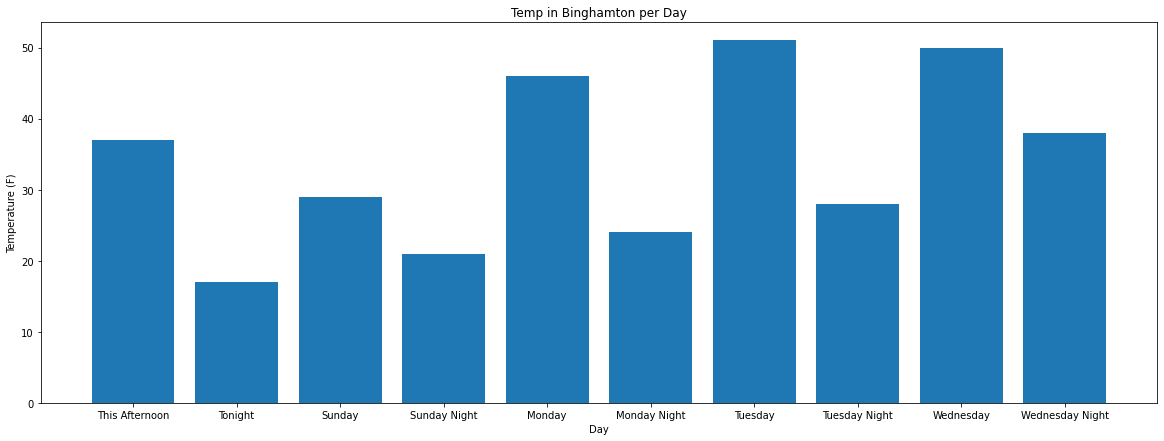

In [86]:
wsheet = pd.read_csv("weather_data")
df = pd.DataFrame(wsheet)
temp = df["Temperature"]
day = df["Day"]

fig = plt.figure(figsize = (20, 7))
#https://stackoverflow.com/questions/20398920/physically-stretch-plot-in-horizontal-direction-in-python
plt.bar(day[0:10], temp[0:10])

plt.xlabel("Day")
plt.ylabel("Temperature (F)")
plt.title("Temp in Binghamton per Day")

plt.show()

- Read through the documentation of this public holiday API. There are seven different calls listed there, use all seven of them. Use comments to explain how the API is working & what each call is accomplishing. (You’ll need to use country codes) (4pts). 

In [66]:
countryCode = "EG" #Initializing the country ISO code
year = 2003 #Initializing the year
url = "https://date.nager.at/api/v3/" #Setting URL as the first part of every url for each call

#Setting a list that'll run through each call
calls = [f"CountryInfo/{countryCode}", #Calls for Country Info  
         "AvailableCountries", #Calls for all available countries
         f"LongWeekend/{year}/{countryCode}", #Calls for when the long weekends are
         f"PublicHolidays/{year}/{countryCode}", #Calls for the public holidays
         f"NextPublicHolidays/{countryCode}", #Calls for the next public holidays
         "NextPublicHolidaysWorldwide", #Calls for all next public holidays
         f"IsTodayPublicHoliday/{countryCode}"] #Calls for if today is a public holiday

try: 
    for i in calls: #Runs through each call in the call list
        pub_holi = requests.get(url + i) #combines the URL with the call to form the complete URL
        json_file = pub_holi.json() #Sets it into a JSON file
        print(json_file) #prints the data
        print( ) #Adds a space
except ValueError: #Accounts for the potential lack of data with "IsTodayPublicHoliday"
    print("There is no public holiday today.")

{'commonName': 'Egypt', 'officialName': 'Arab Republic of Egypt', 'countryCode': 'EG', 'region': 'Africa', 'borders': [{'commonName': 'Israel', 'officialName': 'State of Israel', 'countryCode': 'IL', 'region': 'Asia', 'borders': None}, {'commonName': 'Libya', 'officialName': 'State of Libya', 'countryCode': 'LY', 'region': 'Africa', 'borders': None}, {'commonName': 'Sudan', 'officialName': 'Republic of the Sudan', 'countryCode': 'SD', 'region': 'Africa', 'borders': None}]}

[{'countryCode': 'AD', 'name': 'Andorra'}, {'countryCode': 'AL', 'name': 'Albania'}, {'countryCode': 'AR', 'name': 'Argentina'}, {'countryCode': 'AT', 'name': 'Austria'}, {'countryCode': 'AU', 'name': 'Australia'}, {'countryCode': 'AX', 'name': 'Åland Islands'}, {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'}, {'countryCode': 'BB', 'name': 'Barbados'}, {'countryCode': 'BE', 'name': 'Belgium'}, {'countryCode': 'BG', 'name': 'Bulgaria'}, {'countryCode': 'BJ', 'name': 'Benin'}, {'countryCode': 'BO', 'name': 'Bo

- Then I want you to build a program that gets public holiday info from 10 countries of your choosing in an efficient way.  Count the total number of holidays and store that info. (3pts) Be careful, some countries might not have holidays listed in the API!
- Bonus (2pts) create a bar graph to visualize the number of public holidays in the 10 countries you counted 

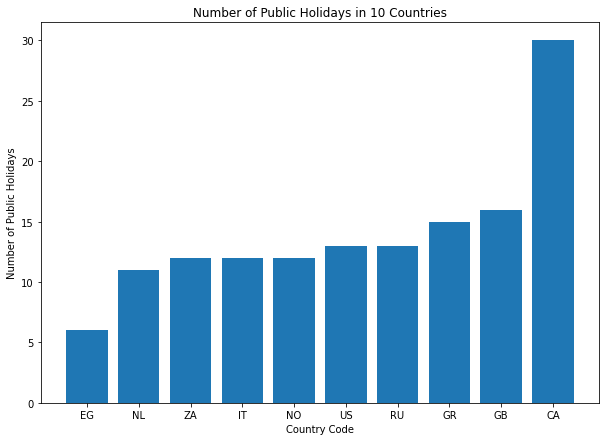

In [90]:
CC = ["CA", "US", "RU", "NL", "GR", "ZA", "IT", "GB", "NO", "EG"]
year = "2023"
csv_file = open("Pub_Holi", "w", newline = "", encoding = "utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Country Code", "Number of Holidays"])

for i in CC:
    url = f"https://date.nager.at/api/v3/PublicHolidays/{year}/{i}"
    pub_holi = requests.get(url)
    json_file = pub_holi.json()
    holi_num = len(json_file)
    csv_writer.writerow([i, holi_num])
csv_file.close()

holi_sheet = pd.read_csv("Pub_Holi")
holi_sheet = holi_sheet.sort_values(by="Number of Holidays", ascending = True)
df = pd.DataFrame(holi_sheet)
holi = df["Number of Holidays"]
CC = df["Country Code"]

fig = plt.figure(figsize = (10, 7))
plt.bar(CC[0:10], holi[0:10])

plt.xlabel("Country Code")
plt.ylabel("Number of Public Holidays")
plt.title("Number of Public Holidays in 10 Countries")

plt.show()